# 1. BUSINESS UNDERSTANDING

With the rapid development of Artificial Intelligence (AI) in recent years, AI has been used in a variety of industries. Such as data mining, manufacturing, and financial services. By building the right models, humans can use AI to perform many tasks that once required complex human intervention. One of the most notable applications is the use of AI in healthcare.

Pneumonia is a serious lung infection that can affect people of all ages, but it is especially dangerous for the elderly, young children, and those with weakened immune systems. The traditional method for diagnosing pneumonia is through a physical examination and laboratory tests, but these methods are time-consuming and frequently require multiple visits to the doctor. This project aims to solve this real-world problem by developing a model that can accurately classify whether a patient has pneumonia based on a chest x-ray image.

This project is important for healthcare professionals and patients who need to get the right diagnosis quickly. Doctors like radiologists and ophthalmologists can use the deep learning model to help them diagnose different medical conditions using medical images. Accurate diagnoses help patients get the right treatment and have better health.

There are different groups of people who have an interest in using deep learning for medical imaging. They include healthcare professionals, patients, hospitals, medical device manufacturers, and insurance companies. Doctors can use deep learning to identify pneumonia cases in medical images more accurately. Patients benefit from accurate diagnoses and treatments. Hospitals can use deep learning to diagnose and treat medical conditions better and use resources more efficiently. Medical device manufacturers can use deep learning to make products that diagnose medical conditions more accurately and efficiently. Insurance companies can save money and improve the health of their customers by using deep learning to make diagnoses more accurate.

Researchers, academics, and government agencies are other stakeholders that may be interested in the development of deep learning models for medical imaging. Researchers can use the models to learn more about diseases and develop new treatments. Government agencies can regulate the use of deep learning in healthcare to make sure it is safe and effective.


## 1.2. Technical Objectives
1. Build a deep learning model that can classify whether a given patient has pneumonia based on a chest x-ray image.
2. Optimize the model architecture and hyperparameters to achieve the highest possible accuracy on the validation set.
3. Use data augmentation techniques to increase the size of the training dataset and improve the model's ability to generalize.
3. Experiment with different optimization algorithms, learning rates, and batch sizes to improve the speed and stability of model training.
4. Evaluate the model's performance using accuracy, precision, recall, and F1 score.

## 1.3. Business Objectives
1. Provide pediatricians with a tool that can quickly and accurately diagnose pneumonia in children, potentially reducing the number of unnecessary hospital visits and improving patient outcomes.
2. Increase the accessibility of pneumonia diagnosis in low-resource settings where trained medical professionals may not be readily available.
3. Potentially reduce healthcare costs by allowing for earlier diagnosis and treatment of pneumonia in pediatric patients.
4. Contribute to the development of a larger dataset for pneumonia diagnosis that can be used for further research and model development.
5. Develop a model that can be easily integrated into existing hospital or clinic workflows, allowing for streamlined and efficient diagnosis.

## 1.3. Success Metrics

1. Precision: The precision metric measures how well the model is able to correctly identify pneumonia cases out of all the samples it predicts as positive. A high precision score indicates that the model is accurate in its positive predictions. To achieve high precision, the model should minimize false positives. For our project, **"the proportion of correctly classified pneumonia cases out of all the samples predicted as pneumonia".**

2. Recall: The recall metric measures how well the model is able to correctly identify pneumonia cases out of all the actual pneumonia cases in the dataset. A high recall score indicates that the model is sensitive to the pneumonia class. To achieve high recall, the model should minimize false negatives. For this project we define its as, **"the proportion of correctly classified pneumonia cases out of all the actual pneumonia cases in the dataset".**

3. F1 Score: The F1 score is a harmonic mean of precision and recall and provides a combined measure of the model's accuracy and sensitivity. It can be useful when you want to balance the importance of correctly identifying both the majority and minority classes. For our case, **"the harmonic mean of precision and recall".**

# 2. RELATED WORK
There has been a significant amount of related work on using deep learning models for pneumonia diagnosis from chest x-ray images. Here are a few examples:

1. Wang et al. (2017) developed a deep learning model based on the Inception architecture to diagnose pneumonia from chest x-ray images. Their model achieved an area under the receiver operating characteristic curve (AUC) of 0.92 on a test set of 279 images, outperforming several other models.
2. Rajpurkar et al. (2017) released a large dataset of chest x-ray images labeled with various pathologies, including pneumonia. They also developed a deep learning model based on the CheXNet architecture that achieved state-of-the-art performance on the task of pneumonia detection.
3. Wang et al. (2018) developed a deep learning model based on the DenseNet architecture that could classify chest x-ray images into various pathologies, including pneumonia. Their model achieved an AUC of 0.887 on a test set of 420 images, outperforming several other models.
4. Chouhan et al. (2020) developed a deep learning model based on the EfficientNet architecture to diagnose pneumonia from chest x-ray images. Their model achieved an accuracy of 95.8% on a test set of 234 images, outperforming several other models.

These studies demonstrate the effectiveness of deep learning models for pneumonia diagnosis from chest x-ray images, as well as the potential for further improvement in accuracy and performance. They also highlight the importance of having access to large and diverse datasets for model training and evaluation.

# 3. DATA UNDERSTANDING

The data source for this project is  Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Large Dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images”, Mendeley Data, V3.The dataset contains 5,847 Chest X-Ray images from patients, with 1,574 images labeled as **normal** and 4,273 images labeled as **pneumonia**.The data can be found [here](https://data.mendeley.com/datasets/rscbjbr9sj/3)

The data is suitable for the project because it contains labeled medical images that can be used to train a deep learning model to accurately classify medical conditions. Medical imaging is an important tool for diagnosing and treating diseases, and accurate and timely diagnoses are critical for improving patient outcomes.

Descriptive statistics for the features used in the analysis are not applicable in this case since the images are not numerical data. Instead, image pre-processing techniques are applied to transform the images into numerical data that can be used to train a deep learning model.


##  3.1. Dataset Limitation
* Due to the fact that the images were obtained from a particular hospital and may not be applicable to other populations, one limitation of the dataset is that it might not be representative of all Chest X-Ray images.
* Furthermore, because there are fewer pneumonia cases than normal cases, the dataset may be skewed. This could impair the model's ability to accurately classify pneumonia cases.
* Another limitation is that the dataset does not include any information about the patients' demographics or medical histories, which could be useful in predicting pneumonia.

## 3.2. Load Data

>Path to train,validation and test directories

In [2]:
# Full Training data directories
train_path = '/home/munyao/Desktop/deku/chest_data/train/'
# Testing data
test_path = "/home/munyao/Desktop/deku/chest_data/test"
# Validation data
val_path = "/home/munyao/Desktop/deku/chest_data/val"

# # Directories for half the data
# train_dir_half = '/home/munyao/Desktop/deku/chest_data/train_half'
# val_dir_half = '/home/munyao/Desktop/deku/chest_data/val_half'
# test_dir_half = '/home/munyao/Desktop/deku/chest_data/test_half'


### 3.2.1. Importing Libraries

>Relevant libraries.

In [90]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split

import cv2
import gc
import os

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras import metrics
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from keras import backend as K
from keras.metrics import Precision, Recall
from sklearn.utils import class_weight

import warnings
warnings.filterwarnings('ignore')


## 3.3. Data Visualization

### 3.3.1. Data Classes

In [4]:
# Visualise the classes in data
classes = os.listdir(train_path)
# Display the image classes
classes

['NORMAL', 'PNEUMONIA']

### 3.3.2. Visualise Sample Images

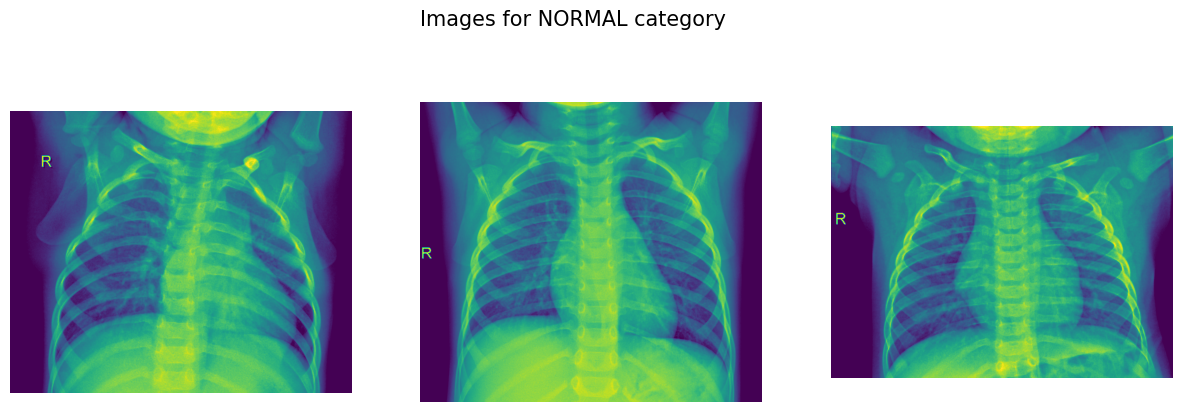

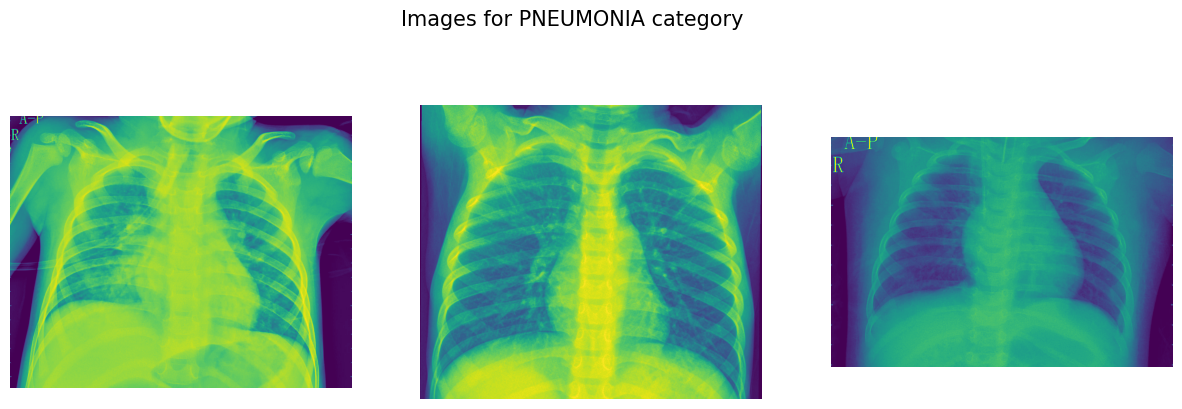

In [5]:
# Load data to view sample images
path = train_path
for cat in classes:
    image_dir = f'{path}/{cat}'
    images = os.listdir(image_dir)
 
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category', fontsize=15)
 
    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

### 3.3.3. Visualize Class Distribution

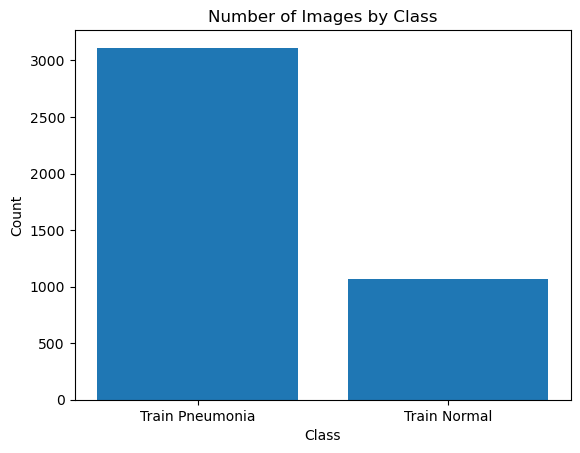

In [6]:
# Path to class pneumonia 
pneu_train_path = train_path+'PNEUMONIA'
# Path to class normal
norm_train_path = train_path+'NORMAL'

# Get the class distribution
number_classes = {'Train Pneumonia': len(os.listdir(pneu_train_path)),
                  'Train Normal': len(os.listdir(norm_train_path))}

plt.bar(number_classes.keys(), number_classes.values())
plt.title("Number of Images by Class")
plt.xlabel('Class')
plt.ylabel('Count')

# Show plot
plt.show()

### 3.3.4. Images to Matrices

In [7]:
# Making n X m matrix
normal_imgs = [fn for fn in os.listdir(f'{norm_train_path}') if fn.endswith('.jpeg')]
pneumo_imgs = [fn for fn in os.listdir(f'{pneu_train_path}') if fn.endswith('.jpeg')]

def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

>This function will iterate through each file and convert it to a (n, m) matrix, where n represents the number of observations and m represents the number of pixels.

### 3.3.5. Average Image for each  Class

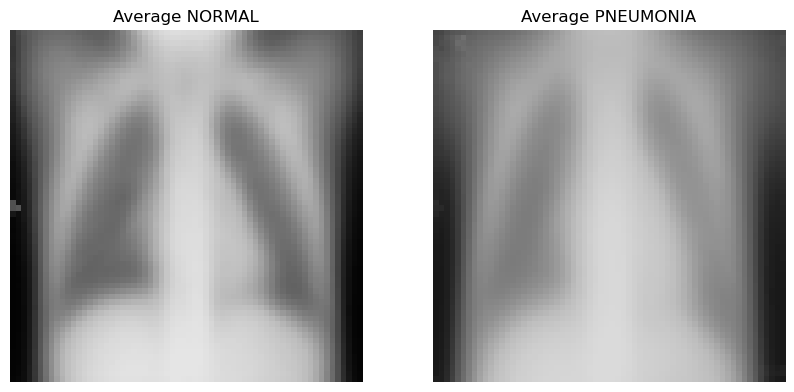

In [8]:
# Matrices train data
normal_images = img2np(f'{train_path}/NORMAL/', normal_imgs)
pnemonia_images = img2np(f'{train_path}/PNEUMONIA/', pneumo_imgs)

def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    return mean_img

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

norm_mean = find_mean_img(normal_images, 'NORMAL')
axs[0].imshow(norm_mean, vmin=0, vmax=255, cmap='Greys_r')
axs[0].set_title('Average NORMAL')
axs[0].axis('off')

pneu_mean = find_mean_img(pnemonia_images, 'PNEUMONIA')
axs[1].imshow(pneu_mean, vmin=0, vmax=255, cmap='Greys_r')
axs[1].set_title('Average PNEUMONIA')
axs[1].axis('off')

plt.show()


>The average image shows that pneumonia X-rays have more obstruction around the chest area.

### 3.3.6. Contrast Between the Classes

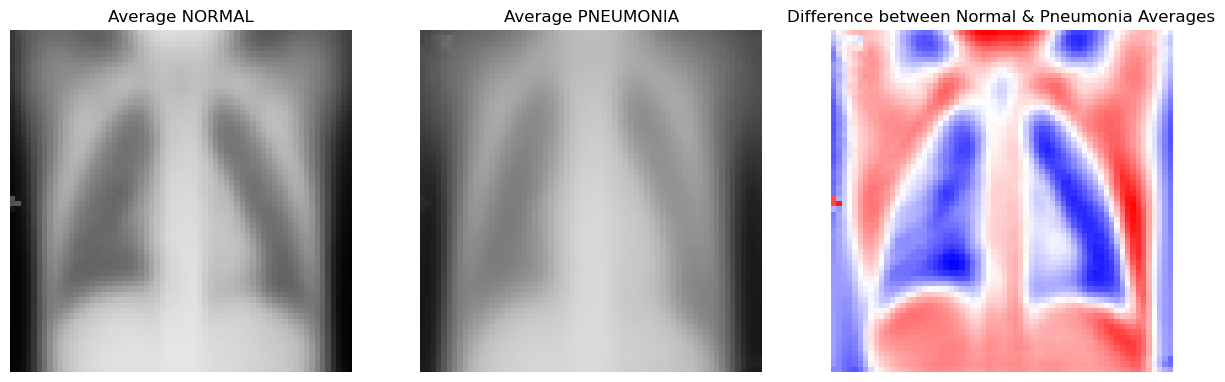

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

norm_mean = find_mean_img(normal_images, 'NORMAL')
axs[0].imshow(norm_mean, vmin=0, vmax=255, cmap='Greys_r')
axs[0].set_title('Average NORMAL')
axs[0].axis('off')

pneu_mean = find_mean_img(pnemonia_images, 'PNEUMONIA')
axs[1].imshow(pneu_mean, vmin=0, vmax=255, cmap='Greys_r')
axs[1].set_title('Average PNEUMONIA')
axs[1].axis('off')

contrast_mean = norm_mean - pneu_mean
axs[2].imshow(contrast_mean, cmap='bwr')
axs[2].set_title('Difference between Normal & Pneumonia Averages')
axs[2].axis('off')

plt.show()


# 4. DATA PREPARATION
Data preprocessing is an important step in building a machine learning model, especially when it comes to medical image classification tasks such as pneumonia classification for our case. The preprocessing steps can help improve the accuracy and generalizability of the model by cleaning and transforming the data to make it more suitable for training the model.


## 4.1. Data Augmentation 

The augmentation parameters provided are used to perform data augmentation on images, which is a common technique used in deep learning to increase the size of a dataset and improve model performance. The parameters include rescaling the image values to be between 0 and 1, rotating the image by up to 20 degrees, shifting the image horizontally and vertically by up to 20% of the image size, shearing the image by up to 20%, zooming into the image by up to 20%, flipping the image horizontally, and filling in any empty space with the nearest pixel value. These augmentations help to create more variability in the dataset, which can improve the model's ability to generalize to new data.

>Function that takes in the data path and the augmentation parameters you provided, performs data augmentation on the images in that path, and then displays a grid of four images: the original image and three randomly augmented images.


In [10]:
# Define function
def display_augmented_images(data, augmentation_params):
    # Define image generator with augmentation parameters
    datagen = ImageDataGenerator(**augmentation_params)

    # Apply augmentation to the data
    augmented_data = datagen.flow(data, batch_size=len(data), shuffle=False).next()

    # Normalize pixel values to the range [0, 1]
    data = data.astype('float32') / 255.0
    augmented_data = augmented_data.astype('float32') / 255.0

    # Display the original and augmented images in a grid
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(data[0])
    axs[0].set_title('Original Image')
    axs[1].imshow(augmented_data[0])
    axs[1].set_title('Augmented Image')

    plt.tight_layout()

    # Show images
    plt.show()

### 4.1.1. Visualize Augmented Image

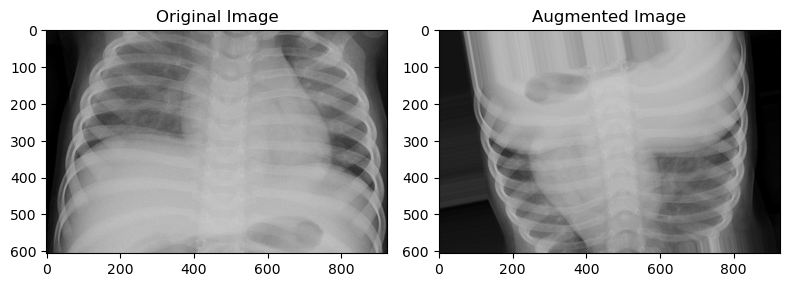

In [11]:
# Image to apply augmentation
data = np.array([plt.imread(os.path.join(pneu_train_path, f)) for f in os.listdir(pneu_train_path)[:1]])

# Augmentation params
augmentation_params = {
    'rotation_range': 15,
    'width_shift_range': 0.2,
    'height_shift_range': 0.2,
    'shear_range': 0.2,
    'zoom_range': 0.2,
    'horizontal_flip': True,
    'vertical_flip': True,
    'brightness_range': (0.8, 1.2)
}

# Call the function
display_augmented_images(data, augmentation_params)

## 4.2. Data Preprocess

In [85]:
# Define the batch size and image dimensions
batch_size = 32
img_height = 150
img_width = 150

# Create an ImageDataGenerator object for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest')

# Create an ImageDataGenerator object for the validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Create a training data generator
train_generator_half = train_datagen.flow_from_directory(
    train_dir_half,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# Create a validation data generator
val_generator_half = val_datagen.flow_from_directory(
    val_dir_half,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# Create an ImageDataGenerator object for the test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_half = test_datagen.flow_from_directory(
    test_dir_half,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')


Found 2088 images belonging to 2 classes.
Found 522 images belonging to 2 classes.
Found 312 images belonging to 2 classes.


# 5. MODELING

## 5.1.  Model_1 Develpment

This convolutional neural network model was created to predict the presence of pneumonia in a patient. It takes a 150 x 150 pixel chest X-ray image with three color channels (RGB) as input and runs it through several convolutional layers to extract features. The model then performs pooling operations on the feature maps to reduce their dimensions, making the model more efficient.
The model's final layer is a dense layer with a sigmoid activation function that outputs a probability score between 0 and 1, indicating the likelihood that the input image contains pneumonia evidence. The binary cross-entropy loss function is used to train the model, which measures the dissimilarity between the predicted probability and the true label (pneumonia or normal).
During training, the model is optimized using the Adam optimizer, which adapts the learning rate during training to help the model converge faster. The model is evaluated using the recall and f_1 score metrics.

### 5.2. Model_1 Architecture

In [81]:
# Add layers
Model_1 = Sequential()
Model_1.add(Conv2D(64, (2, 2),strides=1, input_shape=(150, 150, 3), activation = "relu"))
Model_1.add(MaxPooling2D(pool_size=(2, 2)))

Model_1.add(Conv2D(128, (2, 2),strides=2, activation = "relu"))
Model_1.add(MaxPooling2D(pool_size=(2, 2)))

Model_1.add(Conv2D(128, (3, 3), activation = "relu"))
Model_1.add(MaxPooling2D(pool_size=(2, 2)))

Model_1.add(Flatten())
Model_1.add(Dense(256, activation = "relu"))
Model_1.add(Dropout(0.25))
Model_1.add(Dense(1, activation = "sigmoid"))


#### Compile the Model_1

In [82]:
# Compile
model_1.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy', tf.metrics.Recall()])


#### 5.2.1. Model_1 Summary

In [83]:
# Convert the model summary to a pandas DataFrame
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 149, 149, 64)      832       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 37, 37, 128)       32896     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 18, 18, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 128)       

#### 5.2.2. Train Model_1 

In [86]:
# Train the model using the training data
model_hist_1 = model_1.fit(train_generator_half, epochs=10, validation_data=val_generator_half)


Epoch 1/10
66/66 [==============================] - 100s 2s/step - loss: 0.5884 - accuracy: 0.7428 - recall_11: 0.9955 - val_loss: 0.5819 - val_accuracy: 0.7375 - val_recall_11: 1.0000
Epoch 2/10
66/66 [==============================] - 100s 2s/step - loss: 0.5547 - accuracy: 0.7462 - recall_11: 0.9994 - val_loss: 0.5461 - val_accuracy: 0.7510 - val_recall_11: 0.9844
Epoch 3/10
66/66 [==============================] - 96s 1s/step - loss: 0.5271 - accuracy: 0.7524 - recall_11: 0.9846 - val_loss: 0.4575 - val_accuracy: 0.8314 - val_recall_11: 0.9351
Epoch 4/10
66/66 [==============================] - 97s 1s/step - loss: 0.4648 - accuracy: 0.7883 - recall_11: 0.9434 - val_loss: 0.5206 - val_accuracy: 0.7605 - val_recall_11: 0.6779
Epoch 5/10
66/66 [==============================] - 99s 1s/step - loss: 0.4250 - accuracy: 0.7960 - recall_11: 0.9094 - val_loss: 0.2935 - val_accuracy: 0.8582 - val_recall_11: 0.9481
Epoch 6/10
66/66 [==============================] - 99s 2s/step - loss: 0.3740

## 5.3 Model_2 Architecture

Model_2 using the ResNet50 architecture. The model takes in an input image with a shape of (224, 224, 3), and the output is a binary classification prediction indicating whether the input image is indicative of pneumonia or not. The model consists of a pre-trained ResNet50 model that is used as a feature extractor, followed by a Global Average Pooling layer and two fully connected layers. The last layer uses a sigmoid activation function to produce the binary classification output.

Using a pre-trained model as a feature extractor can help to improve the model's performance since the model has already learned to extract relevant features from images. This approach can also help to reduce the training time, as the pre-trained model's weights are frozen, and only the weights of the additional layers are updated during training.


#### Compile Model_2

In [ ]:
# Modeling
base_model = ResNet50(include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model_2 = Model(inputs=base_model.input, outputs=predictions)


In [56]:
# Define F1 score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return (2 * p * r) / (p + r + 1e-12)

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()
        
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with F1 score metric
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', F1Score(), Recall()])

# Train the model
history_2 = model_2.fit(train_generator_half, 
                        steps_per_epoch=train_steps_per_epoch, 
                        epochs=5, 
                        validation_data=val_generator_half, 
                        validation_steps=val_steps_per_epoch)


Epoch 1/5
66/66 [==============================] - 417s 6s/step - loss: 0.5725 - accuracy: 0.7452 - f1_score: 0.8537 - recall_5: 0.9974 - val_loss: 0.5230 - val_accuracy: 0.7375 - val_f1_score: 0.8490 - val_recall_5: 1.0000
Epoch 2/5
66/66 [==============================] - 389s 6s/step - loss: 0.5232 - accuracy: 0.7471 - f1_score: 0.8528 - recall_5: 0.9833 - val_loss: 0.5134 - val_accuracy: 0.8142 - val_f1_score: 0.8798 - val_recall_5: 0.9221
Epoch 3/5
66/66 [==============================] - 363s 6s/step - loss: 0.4993 - accuracy: 0.7605 - f1_score: 0.8573 - recall_5: 0.9653 - val_loss: 0.4482 - val_accuracy: 0.7644 - val_f1_score: 0.8585 - val_recall_5: 0.9688
Epoch 4/5
66/66 [==============================] - 376s 6s/step - loss: 0.4844 - accuracy: 0.7639 - f1_score: 0.8576 - recall_5: 0.9537 - val_loss: 0.4301 - val_accuracy: 0.7739 - val_f1_score: 0.8637 - val_recall_5: 0.9714
Epoch 5/5
66/66 [==============================] - 397s 6s/step - loss: 0.4883 - accuracy: 0.7557 - f1_s

>The model has been trained for 5 epochs, and each epoch took around 400 seconds to complete. During training, the model achieved an accuracy of around 75%, which gradually increased to approximately 82% in the final epoch.

>The evaluation metrics such as f1 score, recall, and loss have also been computed for both the training and validation sets. The f1 score, which is a combined metric of precision and recall, has been found to be around 85% for the training set, and it increases to around 87% for the validation set in the final epoch. 

>The recall, which measures the fraction of true positives that are correctly identified, has also been found to be high for both the training and validation sets. Overall, this model shows promising results for pneumonia classification, but we require further evaluate on unseen data to determine its actual performance.

## 5.2. Model Tuning

We aim to develop a highly accurate model for a binary classification task on image data. To achieve this goal, we started with a pre-trained VGG16 model and added new trainable layers to it. We then experimented with different hyperparameters to find the best combination that produced the highest accuracy on the test data.

We handle the class imbalance in the dataset using class weights, which assigns more weight to the minority class to balance the contribution of each class during training.

The code also freezes the layers of the pre-trained VGG16 model to prevent overfitting and adds new trainable layers on top. Then, the top layers of the model are unfrozen and fine-tuned using a lower learning rate and the Adam optimizer.

The code also includes a checkpoint to save the best model during training based on the validation recall metric. Finally, the code saves the final model as a **"deku" model**.


### Trained the tuned model

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

### Visualize Convolution Layers

In [87]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Create a new model that outputs the output of each layer
layer_outputs = [layer.output for layer in base_model.layers[:18]]  # only use the first 18 layers
activation_model = tf.keras.models.Model(inputs=base_model.input, outputs=layer_outputs)

def visualize_activations(img_path):
    # Get an example image
    img = image.load_img(img_path, target_size=(img_height, img_width))

    # Preprocess the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Get the activations for each layer
    activations = activation_model.predict(x)

    # Visualize the activations for each layer
    fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(15,30))
    for i, activation in enumerate(activations):
        row = i // 3
        col = i % 3
        axs[row, col].matshow(activation[0, :, :, 1], cmap='viridis')  # visualize the 2nd channel
        axs[row, col].set_title(f'Layers {i+1}-{i+3}')

    # Show subplots    
    plt.show()



#### Normal image

1/1 [==============================] - 1s 573ms/step


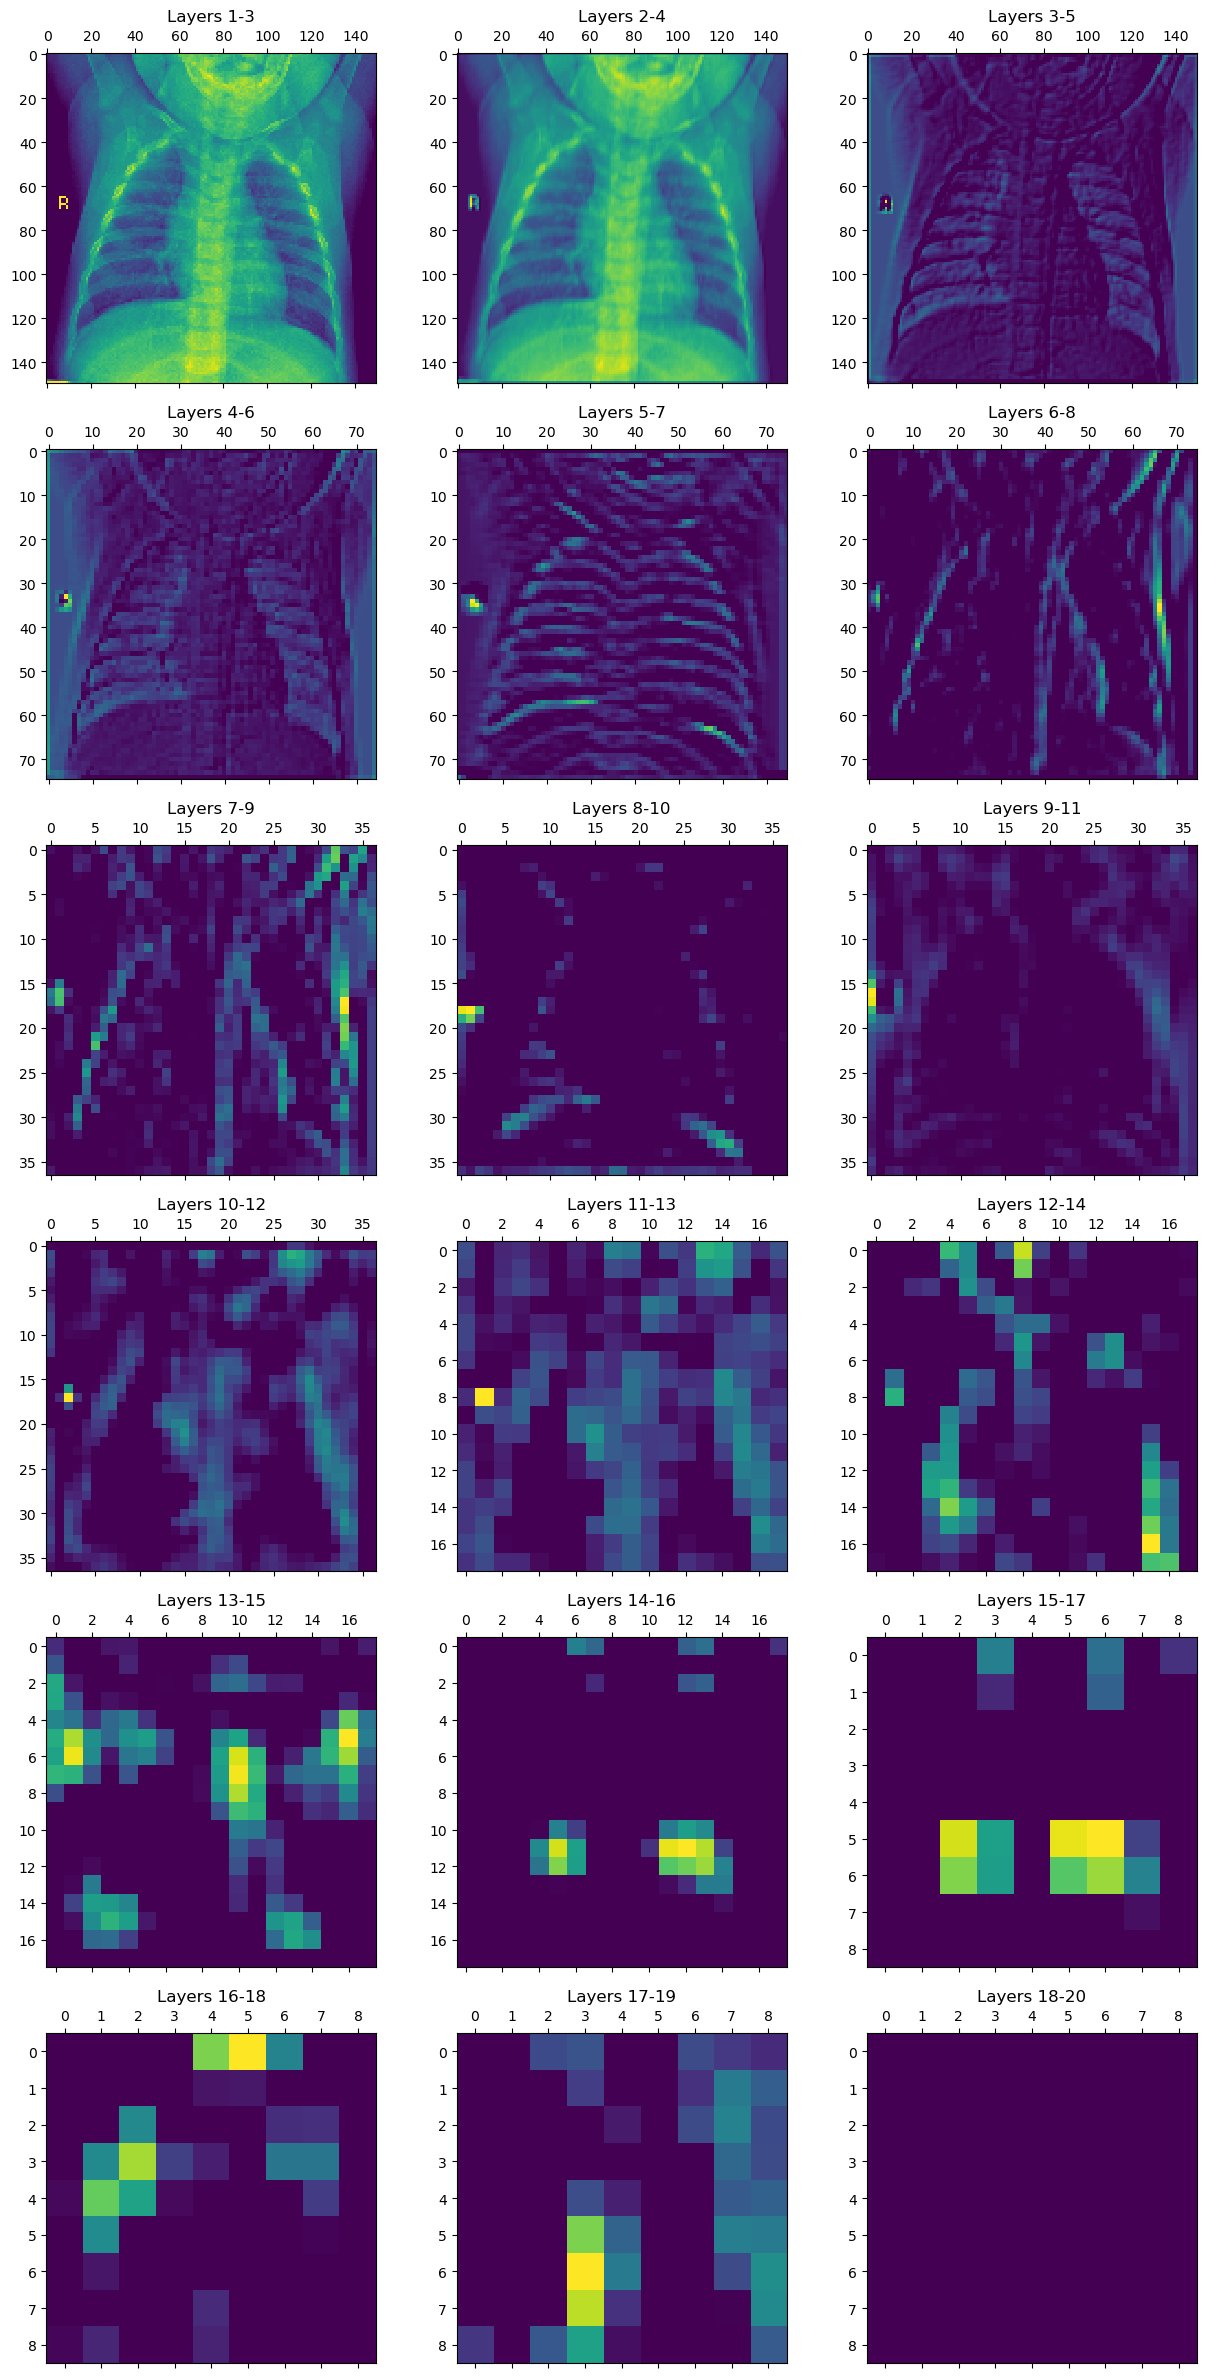

In [91]:
# Example usage
norm_img_path = train_path+'NORMAL/NORMAL-137300-0001.jpeg'

# Call function
visualize_activations(norm_img_path)

#### Pneumonia Image

1/1 [==============================] - 0s 277ms/step


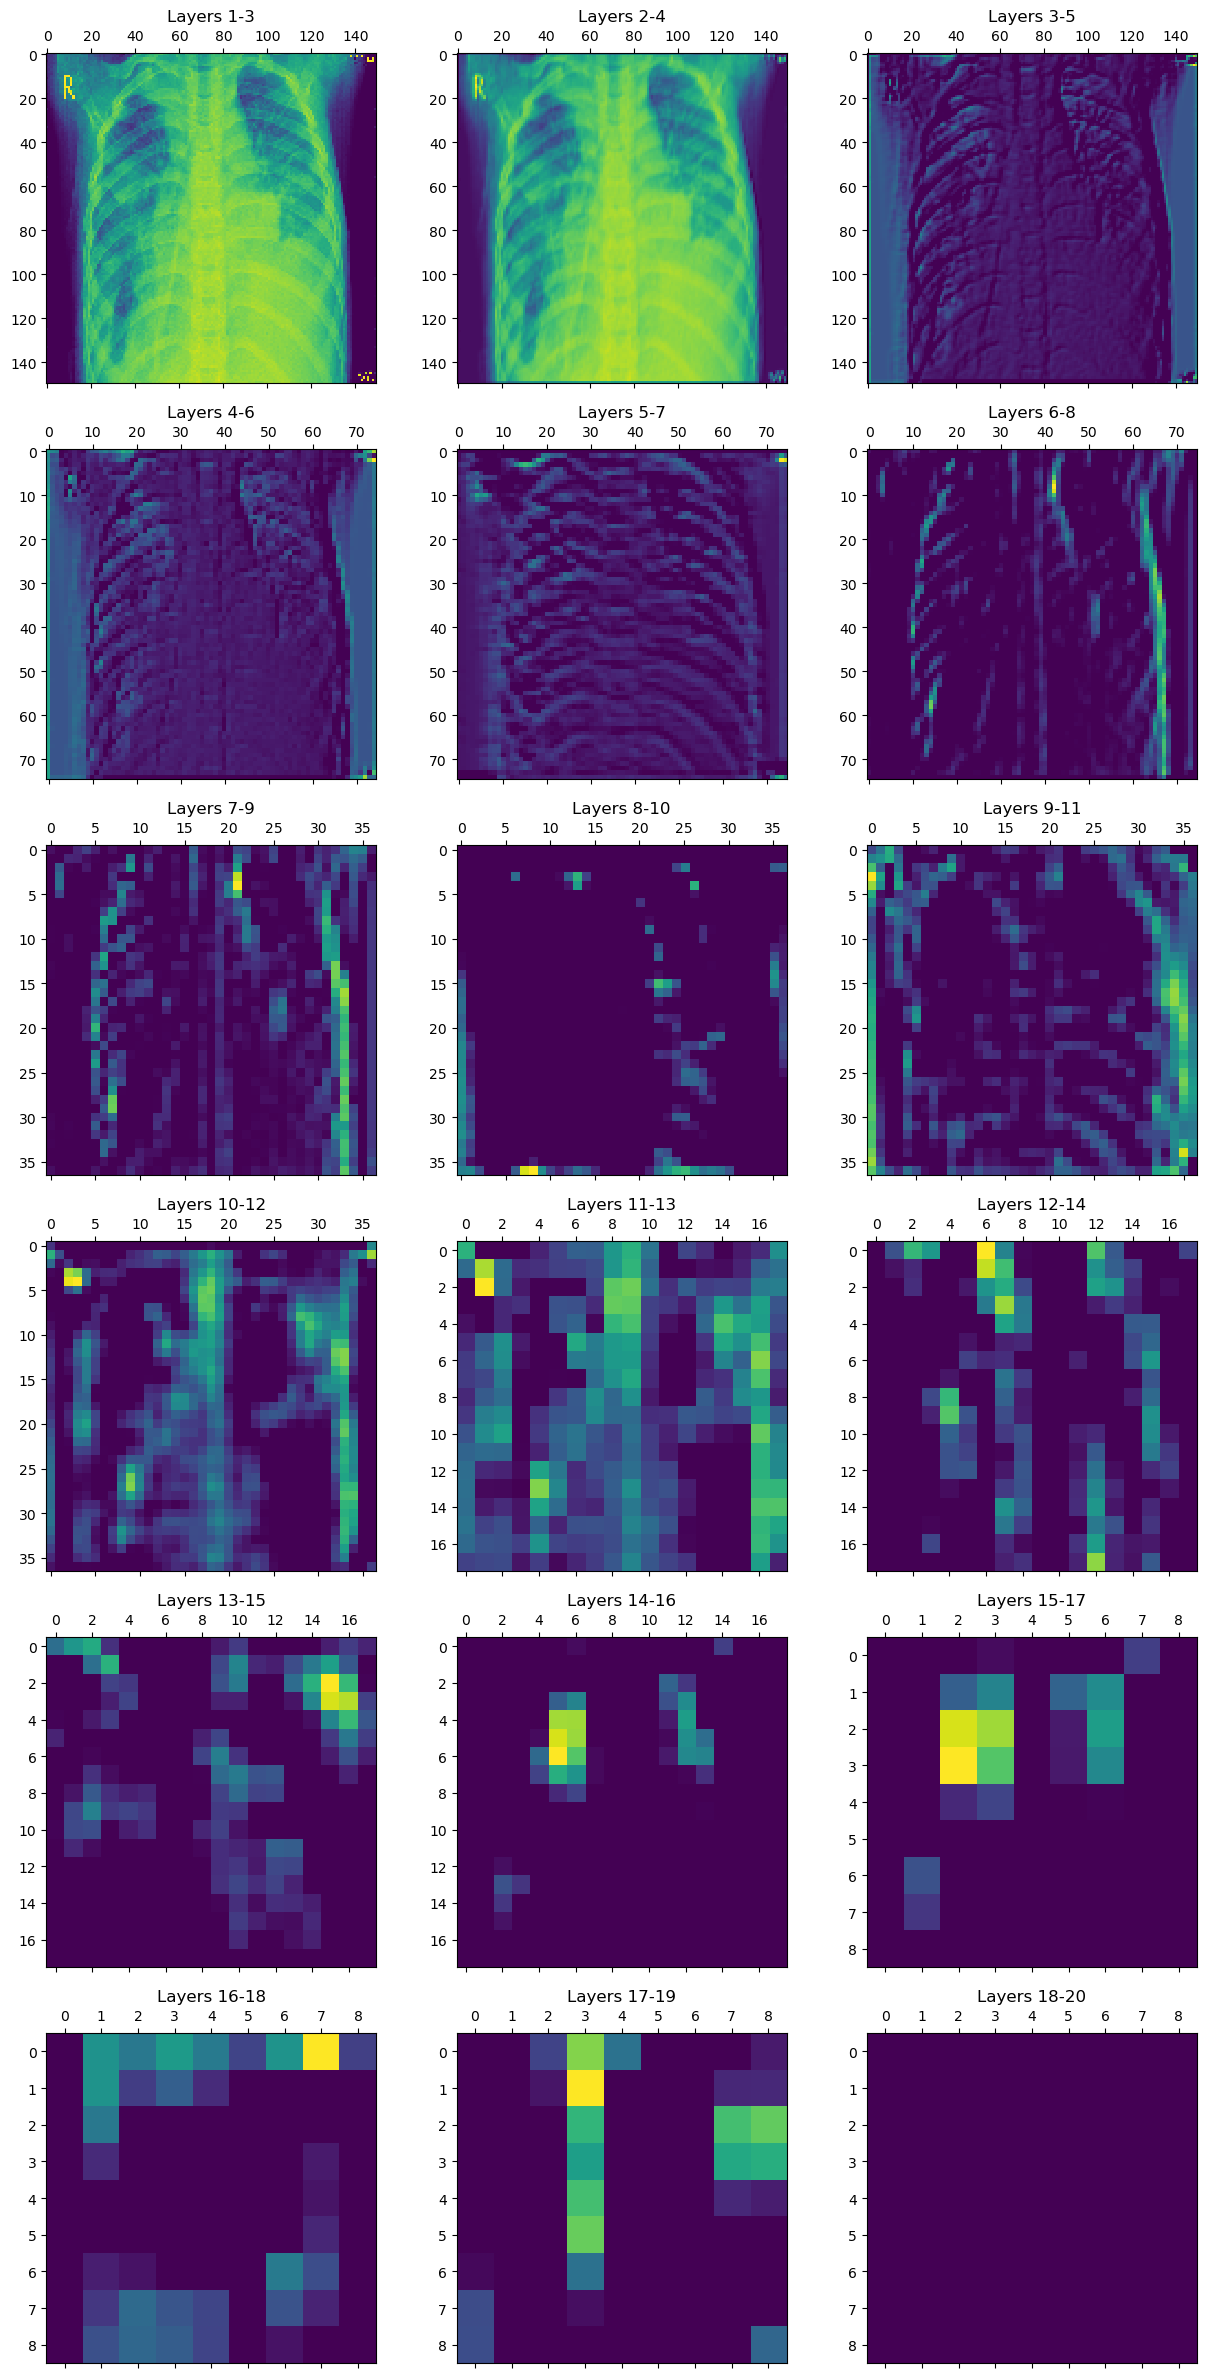

In [92]:
# Get an example image
pneu_img_path = train_path+'PNEUMONIA/BACTERIA-37006-0001.jpeg'

# Call function
visualize_activations(pneu_img_path)

# 6. EVALUATION

* **Precision:** the proportion of true positive predictions out of all positive predictions. 
* **Recall:** the proportion of true positive predictions out of all actual positive cases. 
* **F1-score:** the harmonic mean of precision and recall.

## Final Model

## 6.1. Prediction on Test

In [99]:
y_test = val_generator_half.classes
y_pred = model_1.predict(val_generator_half)
y_pred[y_pred>0.5]=1
y_pred[y_pred<0.5]=0

17/17 [==============================] - 11s 659ms/step


## 6.2. Classification Report

In [100]:
print(classification_report(y_test,y_pred,target_names=['Normal','Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.25      0.34      0.29       137
   Pneumonia       0.73      0.64      0.68       385

    accuracy                           0.56       522
   macro avg       0.49      0.49      0.49       522
weighted avg       0.61      0.56      0.58       522



## 6.3. Confusion Matrix

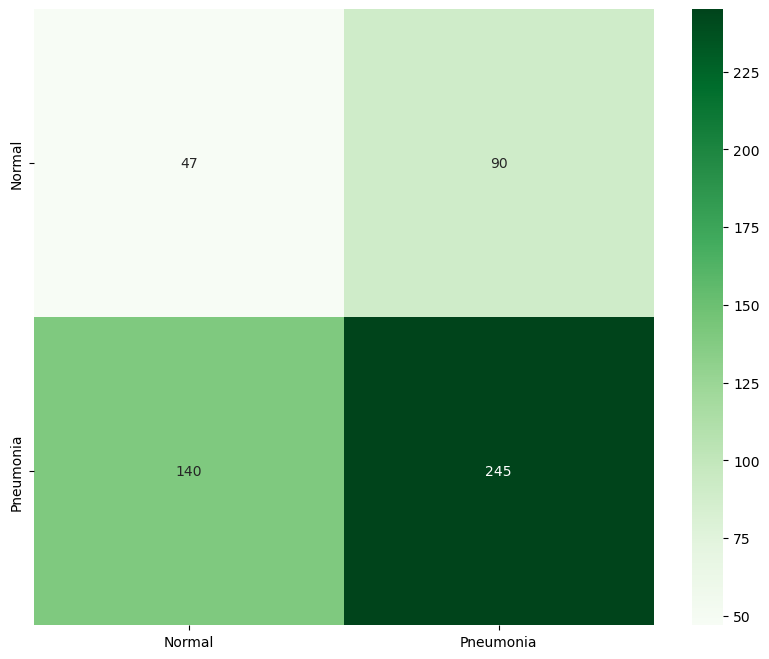

In [101]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,
           fmt='.3g',xticklabels=['Normal', 'Pneumonia'],
           yticklabels=['Normal', 'Pneumonia'],cmap='Greens')
plt.show()


## 6.4. Learning Curves

* Model Accuarcy

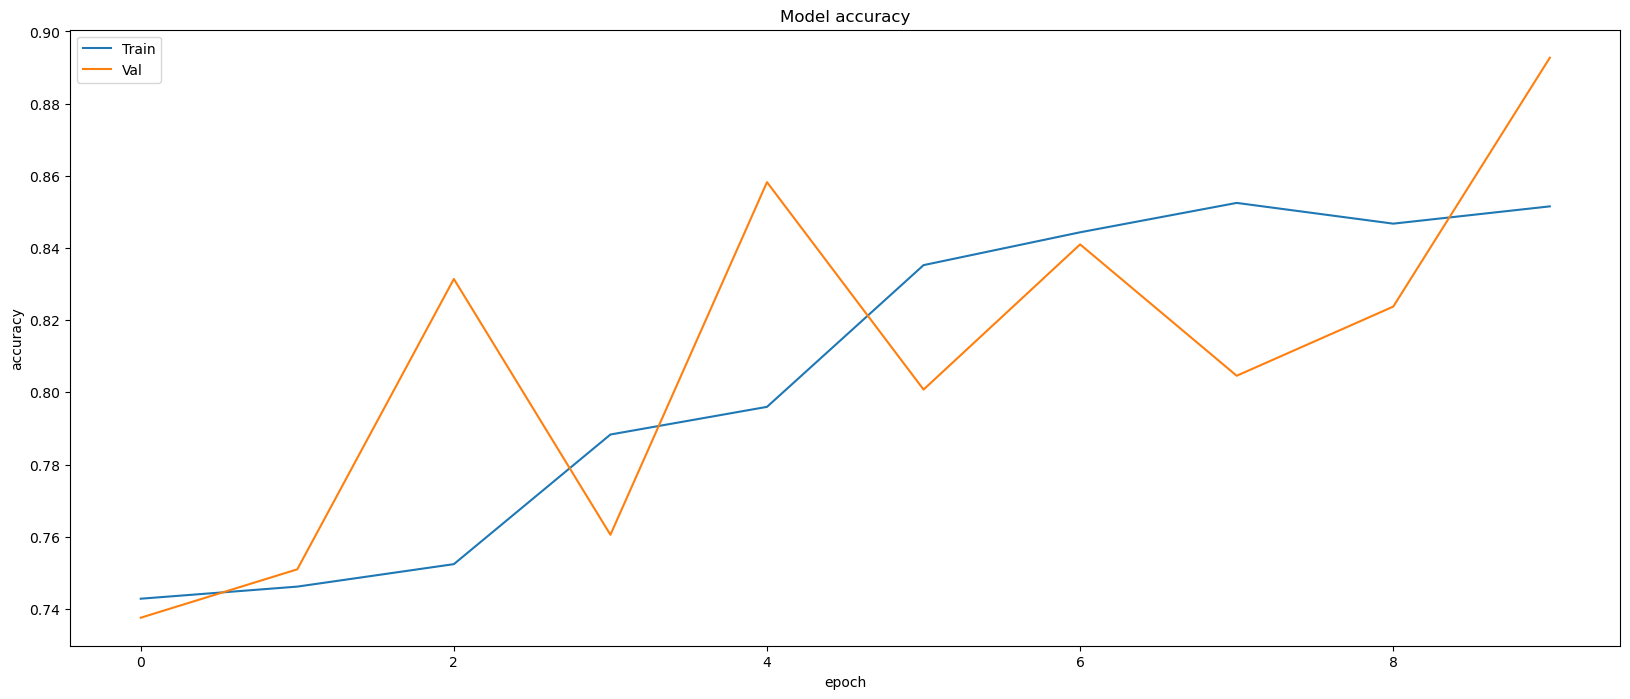

In [106]:
# Plot the training and validation accuracy
plt.figure(figsize=(20,8))
plt.plot(model_hist_1.history['accuracy'])
plt.plot(model_hist_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

* Model Loss

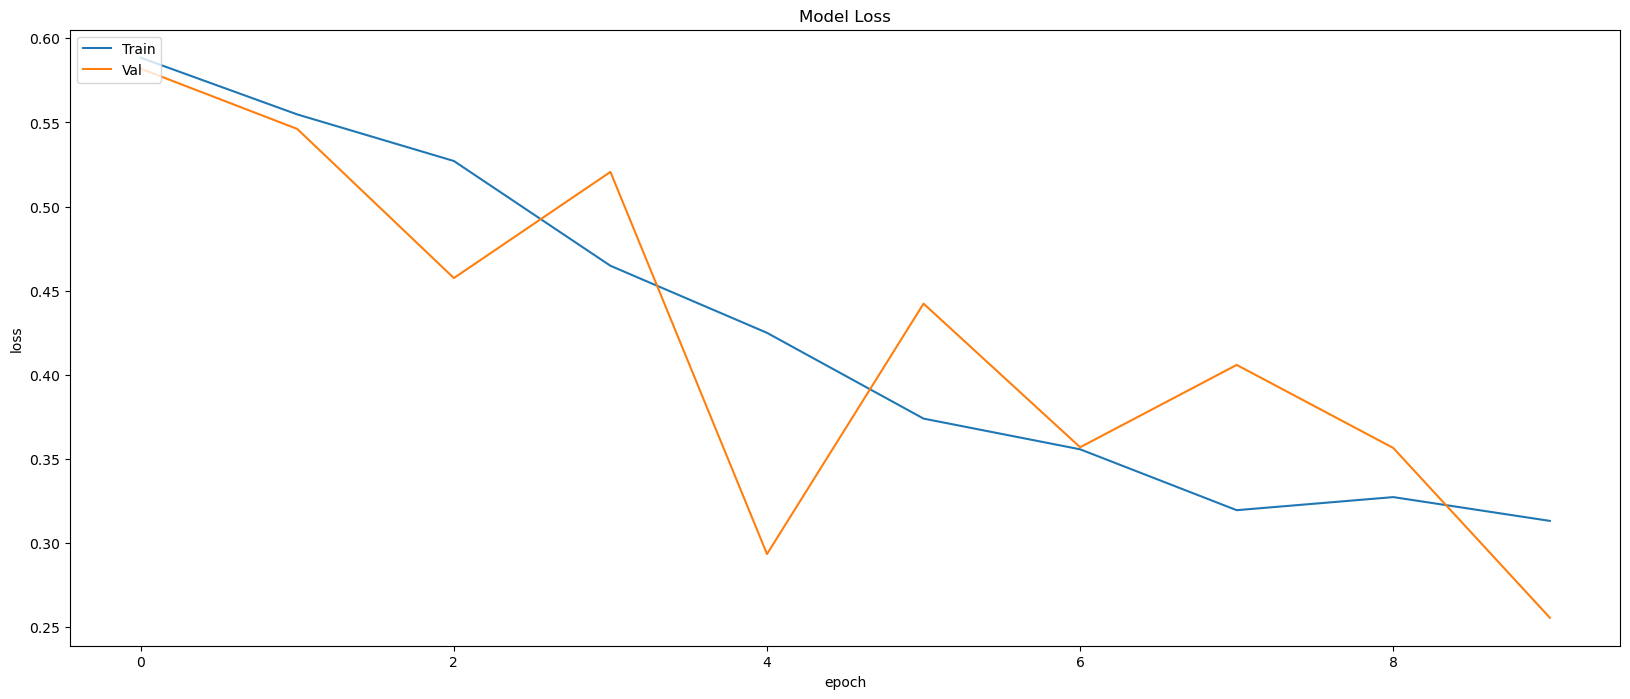

In [107]:
# Plot the training and validation loss
plt.figure(figsize=(20,8))
plt.plot(model_hist_1.history['loss'])
plt.plot(model_hist_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


* Model Recall

In [111]:
# # Recall Pot
# plt.plot(model_hist_1.history['recall'], label='Training recall')
# plt.plot(model_hist_1.history['val_recall'], label='Validation recall')
# plt.title('Model Recall')
# plt.ylabel('Recall')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()


* F1 Score

In [112]:
# # F1 score plot
# plt.plot(model_hist_1.history['f1_score'], label='Training F1 score')
# plt.plot(model_hist_1.history['val_f1_score'], label='Validation F1 score')
# plt.title('Model F1 score')
# plt.ylabel('F1 score')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()


In [113]:
# from tensorflow.keras import backend as K


# plt.figure(figsize=(20,8))
# plt.plot(model_hist_1.history['f1_score'])
# plt.plot(model_hist_1.history['val_f1_score'])
# plt.plot(model_hist_1.history['recall'])
# plt.plot(model_hist_1.history['val_recall'])
# plt.title('Model f1 score and recall')
# plt.ylabel('Score')
# plt.xlabel('Epoch')
# plt.legend(['Train f1 score', 'Val f1 score', 'Train recall', 'Val recall'], loc='upper left')
# plt.show()


# 7. RECOMENDATIONS

# DEPLOYMENT